In [1]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def multiplicacao_convencional(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]

    for i in range(len(A)):  
        for j in range(len(B[0])):  
            for k in range(len(B)): 
                result[i][j] += A[i][k] * B[k][j]
     
    return result

In [3]:
def strassen(A, B):
    
    n = len(A)
    if n == 1:
        return A * B

    mid = n // 2
    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]

    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]

    M1 = strassen(A11 + A22, B11 + B22)
    M2 = strassen(A21 + A22, B11)
    M3 = strassen(A11, B12 - B22)
    M4 = strassen(A22, B21 - B11)
    M5 = strassen(A11 + A12, B22)
    M6 = strassen(A21 - A11, B11 + B12)
    M7 = strassen(A12 - A22, B21 + B22)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    C = np.zeros((n, n))
    C[:mid, :mid] = C11
    C[:mid, mid:] = C12
    C[mid:, :mid] = C21
    C[mid:, mid:] = C22

    return C

In [4]:
def strassen_multiply(A, B):
  
    A = np.array(A)
    B = np.array(B)
    n = max(A.shape[0], A.shape[1], B.shape[0], B.shape[1])
    m = 2**int(np.ceil(np.log2(n)))
    A_pad = np.zeros((m, m))
    B_pad = np.zeros((m, m))
    A_pad[:A.shape[0], :A.shape[1]] = A
    B_pad[:B.shape[0], :B.shape[1]] = B
    C_pad = strassen(A_pad, B_pad)
    return C_pad[:A.shape[0], :B.shape[1]]

In [5]:
def comparar_tempo_multiplicacao(n):

    A = gerar_matriz_quadrada_aleatoria(n)
    B = gerar_matriz_quadrada_aleatoria(n)

    start_time = time.time()
    resultado_strassen = strassen_multiply(A, B)
    tempo_strassen = time.time() - start_time

    start_time = time.time()
    resultado_convencional = multiplicacao_convencional(A, B)
    tempo_convencional = time.time() - start_time

    print(f"Tamanho da matriz: {n}x{n}")
    print(f"Tempo de multiplicação convencional: {tempo_convencional:.6f} segundos")
    print(f"Tempo de multiplicação de Strassen: {tempo_strassen:.6f} segundos")
    print()

In [6]:
def gerar_matriz_quadrada_aleatoria(n, min_val=0, max_val=10):
    return np.random.randint(min_val, max_val + 1, size=(n, n))

In [7]:
for size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 500]:
    comparar_tempo_multiplicacao(size)

Tamanho da matriz: 1x1
Tempo de multiplicação convencional: 0.000000 segundos
Tempo de multiplicação de Strassen: 0.000000 segundos

Tamanho da matriz: 2x2
Tempo de multiplicação convencional: 0.000000 segundos
Tempo de multiplicação de Strassen: 0.000000 segundos

Tamanho da matriz: 4x4
Tempo de multiplicação convencional: 0.000000 segundos
Tempo de multiplicação de Strassen: 0.001001 segundos

Tamanho da matriz: 8x8
Tempo de multiplicação convencional: 0.000000 segundos
Tempo de multiplicação de Strassen: 0.001464 segundos

Tamanho da matriz: 16x16
Tempo de multiplicação convencional: 0.000733 segundos
Tempo de multiplicação de Strassen: 0.014633 segundos

Tamanho da matriz: 32x32
Tempo de multiplicação convencional: 0.015716 segundos
Tempo de multiplicação de Strassen: 0.112644 segundos

Tamanho da matriz: 64x64
Tempo de multiplicação convencional: 0.149185 segundos
Tempo de multiplicação de Strassen: 0.615612 segundos

Tamanho da matriz: 128x128
Tempo de multiplicação convencional:

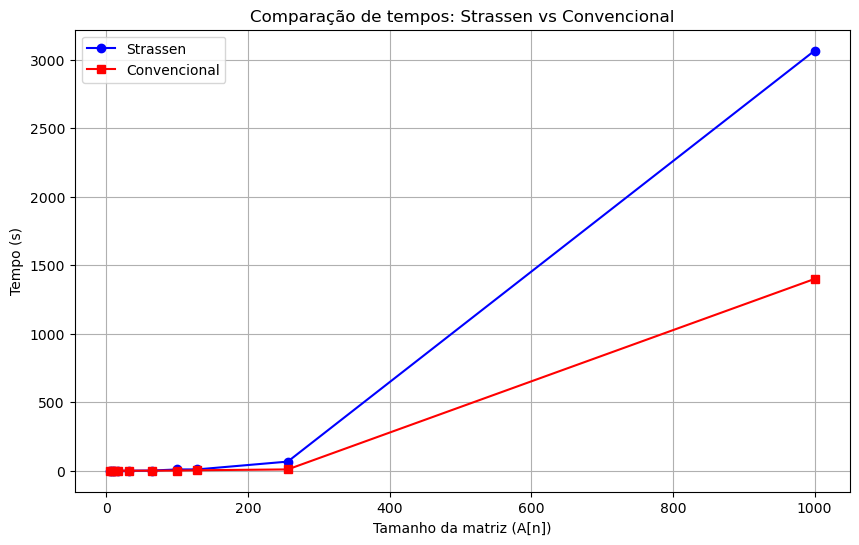

In [8]:
tamanho = [5, 8, 10, 16, 32, 64, 100, 128, 256, 1000]
tempo_strassen = [0.003772, 0.009346, 0.024350, 0.028963, 0.234402, 1.415057, 9.192576, 9.551798, 66.614134, 3066.775945]
tempo_convencional = [0.004482, 0.000000, 0.001257, 0.011273, 0.055154, 0.445314, 1.388547, 3.372339, 9.551798, 1400.275653]

plt.figure(figsize=(10, 6))
plt.plot(tamanho, tempo_strassen, marker='o', label='Strassen', color='blue')
plt.plot(tamanho, tempo_convencional, marker='s', label='Convencional', color='red')


plt.xlabel('Tamanho da matriz (A[n])')
plt.ylabel('Tempo (s)')
plt.title('Comparação de tempos: Strassen vs Convencional')
plt.legend()
plt.grid(True)

plt.show()